In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
df=pd.read_csv("C:/Users/Матвей/Downloads/farm.csv")
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,sale_date_date,contact_id,shop_id,product_id,name,product_sub_category_id,product_category_id,brand_id,quantity
0,2018-12-07,1260627,1455.0,168308.0,(197312) Пакет-майка 25см х 45см,906.0,205.0,-1.0,"1,00"
1,2018-12-07,198287,279.0,134832.0,(62448) Перекись водорода р-р наружн. 3% фл.по...,404.0,93.0,-1.0,"1,00"
2,2018-12-07,2418385,848.0,101384.0,(72183) Салициловая кислота р-р спирт 2% фл 40...,404.0,93.0,-1.0,"1,00"
3,2018-12-07,1285774,1511.0,168570.0,(197309) Пакет 28см х 50см,906.0,205.0,-1.0,"1,00"
4,2018-12-07,1810323,1501.0,168319.0,(197310) Пакет 30см х 60см,906.0,205.0,-1.0,"1,00"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000003 entries, 0 to 20000002
Data columns (total 9 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   sale_date_date           object 
 1   contact_id               object 
 2   shop_id                  float64
 3   product_id               float64
 4   name                     object 
 5   product_sub_category_id  float64
 6   product_category_id      float64
 7   brand_id                 float64
 8   quantity                 object 
dtypes: float64(5), object(4)
memory usage: 1.3+ GB


In [4]:
len(df['brand_id'].unique())

1632

In [5]:
print(df.shape)

(20000003, 9)


In [6]:
print(df.dtypes)

sale_date_date              object
contact_id                  object
shop_id                    float64
product_id                 float64
name                        object
product_sub_category_id    float64
product_category_id        float64
brand_id                   float64
quantity                    object
dtype: object


In [7]:
# отбор числовых колонок
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['shop_id' 'product_id' 'product_sub_category_id' 'product_category_id'
 'brand_id']


In [8]:
# отбор нечисловых колонок
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['sale_date_date' 'contact_id' 'name' 'quantity']


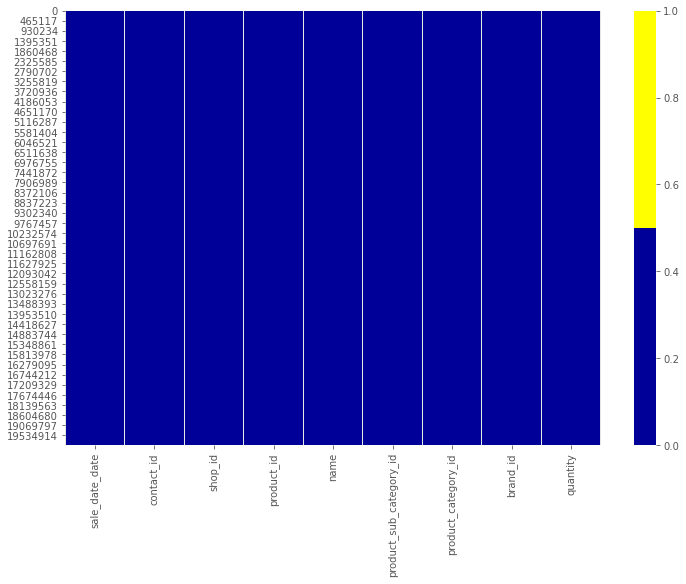

In [9]:
cols = df.columns[:30] # первые 30 колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [10]:
df['brand_id'].describe()

count    2.000000e+07
mean     4.069932e+02
std      9.928448e+02
min     -1.000000e+00
25%     -1.000000e+00
50%     -1.000000e+00
75%     -1.000000e+00
max      5.475000e+03
Name: brand_id, dtype: float64

In [17]:
del df['brand_id']

In [26]:
df.dropna()

,sale_date_date,contact_id,shop_id,product_id,name,product_sub_category_id,product_category_id,quantity
0,2018-12-07,1260627,1455.0,168308.0,(197312) Пакет-майка 25см х 45см,906.0,205.0,"1,00"
1,2018-12-07,198287,279.0,134832.0,(62448) Перекись водорода р-р наружн. 3% фл.по...,404.0,93.0,"1,00"
2,2018-12-07,2418385,848.0,101384.0,(72183) Салициловая кислота р-р спирт 2% фл 40...,404.0,93.0,"1,00"
3,2018-12-07,1285774,1511.0,168570.0,(197309) Пакет 28см х 50см,906.0,205.0,"1,00"
4,2018-12-07,1810323,1501.0,168319.0,(197310) Пакет 30см х 60см,906.0,205.0,"1,00"
...,...,...,...,...,...,...,...,...
19999995,2018-06-13,1601618,1499.0,66842.0,(111992) Кэа Хэлс Ромашка [цветки фильтр-пакет...,615.0,140.0,"1,00"
19999996,2018-06-13,1394104,1495.0,136795.0,(97857) Лориста Н таб. п.о. 50мг+12.5мг №90,738.0,170.0,"1,00"
19999997,2018-06-13,1570654,1516.0,119513.0,(25299) Локрен тб п/о 20мг N28,738.0,170.0,"1,00"
19999998,2018-06-13,1924036,1485.0,71723.0,(60907) Тералиджен табл. п.п.о. 5 мг №25,637.0,146.0,"1,00"
